<div style="text-align: right">CSYE 7245 Big Data Sys and Int Analytics, Assignment 3</div>
<div style="text-align: right"> Rui Wang (001430832), 14th March 2019</div>

# Deep Learning using Keras--Face recognition

**The  Database of Faces**

Can you identify different faces?

**Dataset description:**

Database of Faces, (formerly 'The ORL Database of Faces'), contains a set of face images taken between April 1992 and April 1994 at the lab. The database was used in the context of a face recognition project carried out in collaboration with the Speech, Vision and Robotics Group of the Cambridge University Engineering Department.

There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open/closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). 

The files are in PGM format, and can conveniently be viewed on UNIX (TM) systems using the 'xv' program. The size of each image is 92x112 pixels, with 256 grey levels per pixel. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10).

 

Dataset Link: https://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

## File structure:

#### Part 1: - Deep Learning model 

#### Part 2: - Activation function 

#### Part 3: - Cost function

#### Part 4: - Epochs

#### Part 5: - Gradient estimation

#### Part 6: - Network Architecture

#### Part 7: - Network initialization


## Assignment 3 - Deep Learning using TensorFlow

**Due March 22, 2019**

You MUST do this assignment alone. You can use TensorFlow with Keras and just TensorFlow.

### Part A - Deep Learning model (40 points)   

Create a deep learning model for some data.  You cannot use the same data as another student.  The TAs will set up a data sign-up sheet.    MNIST data is NOT ALLOWED.  

* Apply a Deep Learning model to your data. Validate the accuracy on out of sample data.
* The Deep Learning model can be a CNN, RNN, Autoencoder, Variational autoencoder (VAE), Restricted Boltzmann machine (RBM), Deep belief network (DBN) or Generative Model. It cannot be a simple multilayer perceptron (MLP).


### Part B - Activation function (10 points)  

On _your Deep Learning model data_ 
* Change the activation function (use at least two). How does it effect the accuracy?
* How does it effect how quickly the network plateaus?
* Various activation functions:  
-	Rectified linear unit (ReLU)  
-	TanH   
-	Leaky rectified linear unit (Leaky ReLU)   
-	Parameteric rectified linear unit (PReLU)   
-	Randomized leaky rectified linear unit (RReLU)  
-	Exponential linear unit (ELU)  
-	Scaled exponential linear unit (SELU)  
-	S-shaped rectified linear activation unit (SReLU)  
-	Identity   
-	Binary step  
-	Logistic  
-	ArcTan  
-	Softsign   
-	Adaptive piecewise linear (APL)   
-	SoftPlus  
-	SoftExponential   
-	Sinusoid   
-	Sinc  
-	Gaussian  


### Part C - Cost function (10 points)  

On _your Deep Learning model data_ 
* Change the cost function (use at least two). How does it effect the accuracy?
* How does it effect how quickly the network plateaus?
* Various forms of cost:  
-	Quadratic cost (mean-square error)
-	Cross-Entropy  
-	Hinge   
-	Kullback–Leibler divergence  
-	Cosine Proximity  
-	User defined  



### Part D - Epochs (10 points)  

On _your Deep Learning model data_   
* Change the number of epochs initialization. How does it effect the accuracy?   
* How quickly does the network plateau?  


### Part E - Gradient estimation (10 points)  

On _your Deep Learning model data_ 
* Change the gradient estimation (use at least two). How does it effect the accuracy?
* How does it effect how quickly the network plateaus?
* Various forms of gradient estimation:
-	Stochastic Gradient Descent  
-	Adagrad  
-	RMSProp  
-	ADAM  
-	NAG  
-	Adadelta  
-	Momentum  

### Part F - Network Architecture (10 points)  

On _your Deep Learning model data_ 
* Change the network architecture (use at least two). How does it effect the accuracy?
* How does it effect how quickly the network plateaus?
* Various forms of network architecture:
-	Number of layers  
-	Size of each layer  
-	Connection type   
-	Pre-trained components?   


### Part G - Network initialization  (10 points)   

On _your Deep Learning model data_   
* Change the network initialization (use at least two). How does it effect the accuracy?  
* How does it effect how quickly the network plateaus?  
* Various forms of network initialization:  
-	0   
-	Uniform  
-	Gaussian   
-	Xavier Glorot Initialization   [http://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization](http://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization)  
    -	Xavier Uniform  
    -	Xavier Gaussian  



## Part 1: - Deep Learning model 

### 1.0 Import Necessary Tools

In [1]:
import os
import keras
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import (Dropout, Flatten, Dense, Conv2D, 
                          Activation, MaxPooling2D)
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io

Using TensorFlow backend.


### 1.1 Prepare Data

shape of image is: (112, 92)
size of image is: 10304 pixel


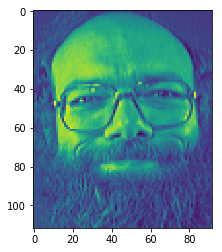

In [2]:
# check the shape and size of 1 sample pic
sampleImg=np.array(io.imread('orl_faces_cnn/Train/s37/2 (1).png')) 
print('shape of image is: {}'.format(sampleImg.shape))
print('size of image is: {} pixel'.format(sampleImg.size))
plt.imshow(sampleImg)

In [3]:
import os

# unify image formatting
def img_format(mainPath,fmt):
    global labels
    labels = [filename for filename in os.listdir(mainPath) if not filename.startswith('.')]
    for label in labels:
        filePath = os.path.join(mainPath, label)
        for img in os.listdir(filePath):
            name = img.split(".")[0]
            newFmt = name+'.'+fmt
            os.rename(os.path.join(mainPath,label,img),os.path.join(mainPath,label,newFmt))
        print(img+' has been converted into ' + newFmt)

In [4]:
# update all picture format

# prepare path for data
train_path = 'orl_faces_cnn/Train'
valid_path = 'orl_faces_cnn/Valid'
test_path = 'orl_faces_cnn/Test'

fmt = 'png'

img_format(train_path, fmt)
img_format(valid_path, fmt)
img_format(test_path, fmt)

1 (9).png has been converted into 1 (9).png
2 (9).png has been converted into 2 (9).png
3 (9).png has been converted into 3 (9).png
4 (9).png has been converted into 4 (9).png
5 (9).png has been converted into 5 (9).png
1 (9).png has been converted into 1 (9).png
2 (9).png has been converted into 2 (9).png
3 (9).png has been converted into 3 (9).png
4 (9).png has been converted into 4 (9).png
5 (9).png has been converted into 5 (9).png
1 (4).png has been converted into 1 (4).png
2 (4).png has been converted into 2 (4).png
3 (4).png has been converted into 3 (4).png
4 (4).png has been converted into 4 (4).png
5 (4).png has been converted into 5 (4).png


In [5]:
# generate img data for train, valid, test

def img_data_generator(train_path, valid_path, test_path, height, width, labels):
    train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(height,width),classes=labels)
    valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(height,width),classes=labels)
    test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(height,width),classes=labels)

In [6]:
mainPath = 'E:/master1_2/7245/assignment/assignment3/data/att_faces.tar/orl_faces_cnn/orl_faces_cnn/Train'
labels = [filename for filename in os.listdir(mainPath) if not filename.startswith('.')]

In [7]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224),classes=labels)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224),classes=labels)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224),classes=labels)

Found 360 images belonging to 5 classes.
Found 40 images belonging to 5 classes.
Found 20 images belonging to 5 classes.


In [8]:
# number of classes
nClass=len(labels)
img, label = next(train_batches)
nClass

5

In [9]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [10]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

The preparation is complete, let's start defining the model.

### 1.2 Set CNN Model

In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery.

CNNs use relatively little pre-processing compared to other image classification algorithms. This means that the network learns the filters that in traditional algorithms were hand-engineered. This independence from prior knowledge and human effort in feature design is a major advantage.

They have applications in image and video recognition, recommender systems, image classification, medical image analysis, and natural language processing.

In [11]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

**Parameter meaning:**

https://www.zhihu.com/question/58200419

https://keras.io/models/model/



**verbose:**
Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.

**steps_per_epoch:**
Integer. Total number of steps (batches of samples) to yield from generator before declaring one epoch finished and starting the next epoch. 

**validation_data:**
tuple (x_val, y_val) or tuple  (x_val, y_val, val_sample_weights) on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data.  validation_data will override validation_split.

**validation_steps:**
Only relevant if steps_per_epoch is specified. Total number of steps (batches of samples) to validate before stopping.

**epochs:**
Integer. Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided. 

In [12]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 9s - loss: 12.8059 - acc: 0.2018 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 2/5
 - 8s - loss: 12.7675 - acc: 0.2079 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 3/5
 - 7s - loss: 12.9471 - acc: 0.1967 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 4/5
 - 8s - loss: 12.7675 - acc: 0.2079 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 5/5
 - 8s - loss: 13.3265 - acc: 0.1732 - val_loss: 12.8945 - val_acc: 0.2000


###### Conclusion: try CNN for face recognition based on a small sample size turns out to be a bad idea

## Part 2: - Activation function

On _your Deep Learning model data_ 
* Change the activation function (use at least two). How does it effect the accuracy?
* How does it effect how quickly the network plateaus?
* Various activation functions:  
-	Rectified linear unit (ReLU)  
-	TanH   
-	Leaky rectified linear unit (Leaky ReLU)   
-	Parameteric rectified linear unit (PReLU)   
-	Randomized leaky rectified linear unit (RReLU)  
-	Exponential linear unit (ELU)  
-	Scaled exponential linear unit (SELU)  
-	S-shaped rectified linear activation unit (SReLU)  
-	Identity   
-	Binary step  
-	Logistic  
-	ArcTan  
-	Softsign   
-	Adaptive piecewise linear (APL)   
-	SoftPlus  
-	SoftExponential   
-	Sinusoid   
-	Sinc  
-	Gaussian  

**Activation function reference：**

https://keras.io/activations/

https://zhuanlan.zhihu.com/p/30510596

https://blog.csdn.net/qq_23304241/article/details/80300149

https://github.com/keras-team/keras/issues/117

When the brain gets a lot of information, it tries to understand and classify useful information and less useful information. In deep learning, we also need a similar mechanism to classify incoming information.

Not all information is useful, some are just noise. The activation function can help the neural network do this isolation. It activates useful information and suppresses irrelevant data points.

The activation function is an extremely important feature of artificial neural networks. It determines whether a neuron should be activated, and activation of information received on behalf of the neuron is related to the given information.

The activation function performs a nonlinear transformation of the input information. The transformed output information is then passed as input information to the next layer of neurons.

### 2.1 tanh

keras.activations.tanh(x)

Hyperbolic tangent activation function.

The tanh function is very similar to the Sigmoid function. It's actually just a larger version of the Sigmoid function.

Tanh(x)=2sigmoid(2x)-1

It can also be expressed directly as:

Tanh(x)=2/(1+e^(-2x)) -1

The Tanh function is similar to the sigmoid function, but the origin is symmetric. It ranges from -1 to 1.

In [15]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('tanh'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

It basically solves all the problems with the same value symbol, and other properties are the same as the sigmoid function. The function is continuous and differentiable. You can see that the function is non-linear, so we can easily propagate the error back.

Compared to the Sigmoid function, the gradient of the tanh function is steeper. Whether the sigmoid function or the tanh function is used depends on the gradient requirements in the problem statement. But the tanh function has a similar problem with the Sigmoid function, the gradient is flattened and the value is very low.

In [16]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 7s - loss: 3.1307 - acc: 0.2000 - val_loss: 2.2292 - val_acc: 0.2000
Epoch 2/5
 - 6s - loss: 2.7588 - acc: 0.2667 - val_loss: 1.9070 - val_acc: 0.2000
Epoch 3/5
 - 7s - loss: 2.9501 - acc: 0.1444 - val_loss: 1.9648 - val_acc: 0.2000
Epoch 4/5
 - 8s - loss: 2.6655 - acc: 0.1778 - val_loss: 1.9836 - val_acc: 0.4000
Epoch 5/5
 - 8s - loss: 2.6633 - acc: 0.1778 - val_loss: 1.9361 - val_acc: 0.3000


The accuracy of the test set has been declining, and the accuracy of the validation set first increases and then decreases, possibly over-fitting.

Can I not use activation function?

If the activation function adds a lot of complexity, can we not activate the function?

Of course not! When we don't use the activation function, the weights and deviations will only be linearly transformed. Linear equations are simple, but their ability to solve complex problems is limited. A neural network without an activation function is essentially a linear regression model. The activation function nonlinearly transforms the input to enable it to learn and perform more complex tasks. We want our neural network to handle complex tasks such as language translation and image classification. Linear transformations can never perform such tasks.

The activation function makes backpropagation possible because the error gradient of the activation function can be used to adjust weights and deviations. This is not possible without a differentiable nonlinear function.

### 2.2 softmax

keras.activations.softmax(x, axis=-1)

Softmax activation function.

Arguments

x: Input tensor.
axis: Integer, axis along which the softmax normalization is applied.
Returns

Tensor, output of softmax transformation.

Raises

ValueError: In case dim(x) == 1.

The softmax function is also a sigmoid function, but it is convenient when dealing with classification problems. The sigmoid function can only handle two classes. What should we do when we want to process multiple classes? It would not be helpful to only classify "yes" or "no" for a single class. The softmax function will compress each class between 0 and 1 and divide by the output sum. It can actually represent the input probability of a class. It is defined as:


For example, we enter [1.2, 0.9, 0.75], and when applying the softmax function, we get [0.42, 0.31, 0.27]. These values can now be used to represent the probability of each class.

The softmax function is best used at the output layer of the classifier.

In [13]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('softmax'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('softmax'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('softmax'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('softmax'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [14]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 15s - loss: 1.6128 - acc: 0.1676 - val_loss: 1.6114 - val_acc: 0.2000
Epoch 2/5
 - 20s - loss: 1.6176 - acc: 0.2162 - val_loss: 1.6111 - val_acc: 0.2000
Epoch 3/5
 - 15s - loss: 1.6171 - acc: 0.1816 - val_loss: 1.6104 - val_acc: 0.2000
Epoch 4/5
 - 14s - loss: 1.6143 - acc: 0.2162 - val_loss: 1.6104 - val_acc: 0.2000
Epoch 5/5
 - 15s - loss: 1.6142 - acc: 0.2052 - val_loss: 1.6102 - val_acc: 0.2000


The accuracy of the test set is wavy, and the accuracy of the validation set has not changed.

### 2.3 linear

keras.activations.linear(x)

Linear (i.e. identity) activation function.

In [21]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [22]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 8s - loss: 4.6015 - acc: 0.2333 - val_loss: 1.6076 - val_acc: 0.2000
Epoch 2/5
 - 7s - loss: 1.7984 - acc: 0.1778 - val_loss: 4.2118 - val_acc: 0.4000
Epoch 3/5
 - 7s - loss: 1.5599 - acc: 0.2667 - val_loss: 3.5857 - val_acc: 0.4000
Epoch 4/5
 - 7s - loss: 1.5365 - acc: 0.3333 - val_loss: 7.6554 - val_acc: 0.4000
Epoch 5/5
 - 7s - loss: 2.7198 - acc: 0.4889 - val_loss: 1.7222 - val_acc: 0.2000


The accuracy of the test set increases, the accuracy of the validation set increases and then decreases, and there may be an over-fitting phenomenon.

### 2.4 LeakyReLU



The Leaky ReLU function is just a modified version of the ReLU function. We see that in the ReLU function, the gradient is 0 when x < 0, which causes neurons in this region to die. In order to solve this problem, Leaky ReLU appeared. This is its definition:

f(x)= ax, x<0

= x, x>=0

All we did was simply replace the horizontal line with a non-horizontal line. Here a is a small value, such as 0.01.

The main advantage of replacing the horizontal line is to remove the zero gradient.

In [16]:
from keras.layers.advanced_activations import LeakyReLU, PReLU

Activations that are more complex than a simple TensorFlow/Theano/CNTK function (eg. learnable activations, which maintain a state) are available as Advanced Activation layers, and can be found in the module keras.layers.advanced_activations. These include PReLU and LeakyReLU.

In [24]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(LeakyReLU(alpha=.001))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(LeakyReLU(alpha=.001))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(LeakyReLU(alpha=.001))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(LeakyReLU(alpha=.001))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(LeakyReLU(alpha=.001))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [25]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 9s - loss: 7.2312 - acc: 0.2111 - val_loss: 1.6356 - val_acc: 0.2000
Epoch 2/5
 - 8s - loss: 2.6616 - acc: 0.1889 - val_loss: 1.6113 - val_acc: 0.2000
Epoch 3/5
 - 8s - loss: 2.5635 - acc: 0.2333 - val_loss: 1.5316 - val_acc: 0.2000
Epoch 4/5
 - 8s - loss: 1.9345 - acc: 0.2444 - val_loss: 1.5146 - val_acc: 0.4000
Epoch 5/5
 - 8s - loss: 1.8285 - acc: 0.3000 - val_loss: 1.4963 - val_acc: 0.2000


The accuracy of the test set increases, the accuracy of the validation set increases and then decreases, and there may be an over-fitting phenomenon.

### 2.5 PReLU

Similar to the Leaky ReLU function, there is also a PReLU function, which is defined similarly to Leaky ReLU.

f(x)= ax, x<0

= x, x>=0

However, in the PReLU function, a is also a trainable function. The neural network also learns the value of a to get faster and better convergence. When the Leaky ReLU function still fails to solve the dead neuron problem and the relevant information is not successfully passed to the next layer, consider using the PReLU function.



In [ ]:
#activation='linear'

In [ ]:
#add(LeakyReLU(alpha=0.1))

In [ ]:
#model.add(PReLU())

In [17]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(PReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(PReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(PReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(PReLU())
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(PReLU())

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [18]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 9s - loss: 4.7553 - acc: 0.1805 - val_loss: 1.6689 - val_acc: 0.2000
Epoch 2/5
 - 8s - loss: 2.2112 - acc: 0.2267 - val_loss: 1.5980 - val_acc: 0.2000
Epoch 3/5
 - 8s - loss: 1.6125 - acc: 0.2040 - val_loss: 1.5872 - val_acc: 0.4000
Epoch 4/5
 - 9s - loss: 1.7319 - acc: 0.2489 - val_loss: 1.5720 - val_acc: 0.6000
Epoch 5/5
 - 9s - loss: 1.5754 - acc: 0.2455 - val_loss: 1.5627 - val_acc: 0.3000


The accuracy of the test set increases, the accuracy of the verification set increases and then decreases, and there may be an over-fitting phenomenon.
Using PReLU as the activation function produces higher accuracy than the previous activation function, and perhaps this is the appropriate activation function.

Sigmoid and tanh are "saturation activation functions", while ReLU and its variants are "unsaturated activation functions". The advantages of using the "unsaturated activation function" are two points:
     1. First, the "unsaturated activation function" solves the so-called "gradient disappearance" problem.
     2. Second, it can speed up the convergence.
     The Sigmoid function requires a real-valued input to be compressed to the range [0,1]
     σ(x) = 1 / (1 + exp(−x))
     The tanh function needs to say that a real value input is compressed to the range of [-1, 1]
     Tanh(x) = 2σ(2x) − 1

How to choose an activation function:
Sigmoid functions and their combinations usually work better when used with classifiers.
Due to the disappearance of the gradient, it is sometimes necessary to avoid using the sigmoid and tanh functions.
The ReLU function is a generic activation function that is currently used in most cases.
If dead neurons appear in the neural network, the PReLU function is the best choice.
Keep in mind that ReLU functions can only be used in hidden layers.

Activation function  | Accuracy
------------- | ------------- 
tanh |  0.2667
softmax |  0.2162
linear |  0.4889
LeakyReLU |  0.3000
PReLU |  0.2455


## Part 3: - Cost function

On _your Deep Learning model data_ 
* Change the cost function (use at least two). How does it effect the accuracy?
* How does it effect how quickly the network plateaus?
* Various forms of cost:  
-	Quadratic cost (mean-square error)
-	Cross-Entropy  
-	Hinge   
-	Kullback–Leibler divergence  
-	Cosine Proximity  
-	User defined  


https://keras.io/losses/

http://www.csuldw.com/2016/03/26/2016-03-26-loss-function/

https://en.wikipedia.org/wiki/Hinge_loss

A loss function (or objective function, or optimization score function) is one of the two parameters required to compile a mode.
It is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event. An optimization problem seeks to minimize a loss function. An objective function is either a loss function or its negative (in specific domains, variously called a reward function, a profit function, a utility function, a fitness function, etc.), in which case it is to be maximized.

The loss function is used to estimate the degree of inconsistency between the predicted value f(x) of your model and the true value Y. The pass is expressed by L(Y,f(x)). The smaller the loss function, the more the model it is good.

### 3.1 categorical_crossentropy

In general, if the last layer is connected to softmax as the classification probability output, categorical_crossentropy will be used as the loss function, so the framework will optimize and will combine and find the gradients of the two formulas. After the combination, the loss calculation will be super simple.

In [28]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [29]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 8s - loss: 2.7038 - acc: 0.1556 - val_loss: 1.6166 - val_acc: 0.2000
Epoch 2/5
 - 7s - loss: 1.6150 - acc: 0.3333 - val_loss: 1.5924 - val_acc: 0.5000
Epoch 3/5
 - 7s - loss: 1.5962 - acc: 0.2000 - val_loss: 1.5682 - val_acc: 0.2000
Epoch 4/5
 - 7s - loss: 1.5708 - acc: 0.2556 - val_loss: 1.5500 - val_acc: 0.2000
Epoch 5/5
 - 7s - loss: 1.5506 - acc: 0.2778 - val_loss: 1.5351 - val_acc: 0.6000


The accuracy rate is not very stable.

In [ ]:
#model.compile(loss='mean_squared_error', optimizer='sgd')


### 3.2 mean_squared_error

Mean squared error regression loss

In [ ]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])

In [20]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 7s - loss: nan - acc: 0.2169 - val_loss: nan - val_acc: 0.2000
Epoch 2/5
 - 6s - loss: nan - acc: 0.1613 - val_loss: nan - val_acc: 0.2000
Epoch 3/5
 - 6s - loss: nan - acc: 0.2371 - val_loss: nan - val_acc: 0.2000
Epoch 4/5
 - 6s - loss: nan - acc: 0.2101 - val_loss: nan - val_acc: 0.2000
Epoch 5/5
 - 6s - loss: nan - acc: 0.1923 - val_loss: nan - val_acc: 0.2000


There is no change in the verification set accuracy.

### 3.3 hinge

In machine learning, the hinge loss is a loss function used for training classifiers. The hinge loss is used for "maximum-margin" classification, most notably for support vector machines (SVMs).

In [36]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='hinge',
              optimizer='sgd',
              metrics=['accuracy'])

In [37]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 7s - loss: 14.3224 - acc: 0.1889 - val_loss: 0.8000 - val_acc: 0.2000
Epoch 2/5
 - 7s - loss: 291.0070 - acc: 0.2000 - val_loss: 6208742400.0000 - val_acc: 0.2000
Epoch 3/5
 - 7s - loss: nan - acc: 0.1444 - val_loss: nan - val_acc: 0.2000
Epoch 4/5
 - 8s - loss: nan - acc: 0.2000 - val_loss: nan - val_acc: 0.2000
Epoch 5/5
 - 7s - loss: nan - acc: 0.2000 - val_loss: nan - val_acc: 0.2000


not a good result

### 3.4 kullback_leibler_divergence

In mathematical statistics, the Kullback–Leibler divergence (also called relative entropy) is a measure of how one probability distribution is different from a second, reference probability distribution.[1][2] Applications include characterizing the relative (Shannon) entropy in information systems, randomness in continuous time-series, and information gain when comparing statistical models of inference. In contrast to variation of information, it is a distribution-wise asymmetric measure and thus does not qualify as a statistical metric of spread (it also does not satisfy the triangle inequality). In the simple case, a Kullback–Leibler divergence of 0 indicates that the two distributions in question are identical. In simplified terms, it is a measure of surprise, with diverse applications such as applied statistics, fluid mechanics, neuroscience and machine learning.

In [43]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='kullback_leibler_divergence',
              optimizer='sgd',
              #查一下optimizer是啥
              metrics=['accuracy'])

In [44]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 9s - loss: 5.5518 - acc: 0.1889 - val_loss: 4.8354 - val_acc: 0.2000
Epoch 2/5
 - 7s - loss: 6.0891 - acc: 0.1778 - val_loss: 4.8354 - val_acc: 0.2000
Epoch 3/5
 - 8s - loss: 5.9100 - acc: 0.2000 - val_loss: 4.8354 - val_acc: 0.2000
Epoch 4/5
 - 8s - loss: 7.1909 - acc: 0.1667 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 5/5
 - 7s - loss: 7.7009 - acc: 0.2222 - val_loss: 9.6709 - val_acc: 0.2000


### 3.5 logcosh

log(cosh(x)) is approximately equal to (x ** 2) / 2 for small x and to abs(x) - log(2) for large x. This means that 'logcosh' works mostly like the mean squared error, but will not be so strongly affected by the occasional wildly incorrect prediction.

The logarithm is used to facilitate the calculation of the maximum likelihood estimation, because in MLE, direct derivation is more difficult, so it is usually first to take the logarithm and then to find the extreme point.

In [21]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='logcosh',
              optimizer='rmsprop',
              #查一下optimizer是啥
              metrics=['accuracy'])

In [22]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 8s - loss: 9064.1871 - acc: 0.2489 - val_loss: 11127.9092 - val_acc: 0.2000
Epoch 2/5
 - 6s - loss: 7864.6727 - acc: 0.2162 - val_loss: 1374.8699 - val_acc: 0.2000
Epoch 3/5
 - 6s - loss: 1017.8504 - acc: 0.1923 - val_loss: 330.4903 - val_acc: 0.2000
Epoch 4/5
 - 7s - loss: 733.9107 - acc: 0.1646 - val_loss: 367.1722 - val_acc: 0.2000
Epoch 5/5
 - 6s - loss: 348.6674 - acc: 0.2276 - val_loss: 215.2169 - val_acc: 0.2000


There is no change in the verification set accuracy.

The more parameters, the more complex the model, and the more complex the model, the easier it is to overfit. Overfitting means that the model performs much better on the training data than on the test set. At this point, regularization can be considered. By setting the hyper parameter in front of the regular term, weigh the loss function and the regular term, reduce the parameter size, and achieve the purpose of model simplification, so that the model has better generalization ability.

Cost function  | Accuracy
------------- | ------------- 
categorical_crossentropy |  0.3333
mean_squared_error |  0.2371
hinge |  0.2000
kullback_leibler_divergence |  0.2222
logcosh |  0.2489


## Part 4: - Epochs

On _your Deep Learning model data_   
* Change the number of epochs initialization. How does it effect the accuracy?   
* How quickly does the network plateau?  


https://keras.io/getting-started/faq/#what-does-sample-batch-epoch-mean

**Epoch:**
an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

### 4.1

In [23]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [24]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 8s - loss: 7.1781 - acc: 0.1570 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 2/5
 - 7s - loss: 8.0953 - acc: 0.2384 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 3/5
 - 7s - loss: 9.5637 - acc: 0.1570 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 4/5
 - 7s - loss: 8.4185 - acc: 0.2478 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 5/5
 - 7s - loss: 7.8785 - acc: 0.2147 - val_loss: 9.6709 - val_acc: 0.4000


In [25]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=10, verbose=2)

Epoch 1/10
 - 7s - loss: 8.6102 - acc: 0.2393 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 2/10
 - 7s - loss: 8.9103 - acc: 0.2173 - val_loss: 9.6709 - val_acc: 0.3000
Epoch 3/10
 - 7s - loss: 8.6292 - acc: 0.2029 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 4/10
 - 7s - loss: 7.7556 - acc: 0.2301 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 5/10
 - 7s - loss: 8.9553 - acc: 0.1581 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 6/10
 - 7s - loss: 8.0620 - acc: 0.2921 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 7/10
 - 7s - loss: 7.9501 - acc: 0.2029 - val_loss: 9.6709 - val_acc: 0.5000
Epoch 8/10
 - 7s - loss: 8.3990 - acc: 0.2384 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 9/10
 - 7s - loss: 8.5579 - acc: 0.2382 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 10/10
 - 7s - loss: 9.4708 - acc: 0.2489 - val_loss: 9.6709 - val_acc: 0.4000


Accuracy increases first and then falls, and there is over-fitting.

### 4.2

In [26]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

In [27]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=10, verbose=2)

Epoch 1/10
 - 9s - loss: 5.3557 - acc: 0.1752 - val_loss: 6.4472 - val_acc: 0.2000
Epoch 2/10
 - 6s - loss: 7.0798 - acc: 0.1934 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 3/10
 - 7s - loss: 6.4477 - acc: 0.2489 - val_loss: 9.7900 - val_acc: 0.3000
Epoch 4/10
 - 6s - loss: 7.9479 - acc: 0.2253 - val_loss: 9.8597 - val_acc: 0.4000
Epoch 5/10
 - 7s - loss: 7.5184 - acc: 0.2289 - val_loss: 9.9123 - val_acc: 0.2000
Epoch 6/10
 - 6s - loss: 9.3805 - acc: 0.2735 - val_loss: 4.8478 - val_acc: 0.2000
Epoch 7/10
 - 7s - loss: 8.2135 - acc: 0.2173 - val_loss: 4.5920 - val_acc: 0.2000
Epoch 8/10
 - 7s - loss: 7.0566 - acc: 0.1614 - val_loss: 4.4557 - val_acc: 0.2000
Epoch 9/10
 - 7s - loss: 7.5718 - acc: 0.1508 - val_loss: 4.3651 - val_acc: 0.2000
Epoch 10/10
 - 6s - loss: 7.5793 - acc: 0.2125 - val_loss: 4.3404 - val_acc: 0.2000


In [28]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=15, verbose=2)

Epoch 1/15
 - 7s - loss: 6.6350 - acc: 0.1827 - val_loss: 4.3510 - val_acc: 0.2000
Epoch 2/15
 - 7s - loss: 6.9787 - acc: 0.1752 - val_loss: 4.3774 - val_acc: 0.2000
Epoch 3/15
 - 6s - loss: 6.3154 - acc: 0.1934 - val_loss: 4.4315 - val_acc: 0.2000
Epoch 4/15
 - 6s - loss: 6.9909 - acc: 0.1763 - val_loss: 4.5980 - val_acc: 0.2000
Epoch 5/15
 - 6s - loss: 7.2112 - acc: 0.2074 - val_loss: 4.9876 - val_acc: 0.2000
Epoch 6/15
 - 6s - loss: 7.6746 - acc: 0.1835 - val_loss: 10.1178 - val_acc: 0.2000
Epoch 7/15
 - 6s - loss: 8.4853 - acc: 0.2276 - val_loss: 10.0976 - val_acc: 0.2000
Epoch 8/15
 - 6s - loss: 10.0190 - acc: 0.1846 - val_loss: 10.0689 - val_acc: 0.2000
Epoch 9/15
 - 6s - loss: 7.1751 - acc: 0.2265 - val_loss: 10.2928 - val_acc: 0.2000
Epoch 10/15
 - 7s - loss: 7.7317 - acc: 0.2079 - val_loss: 11.4032 - val_acc: 0.2000
Epoch 11/15
 - 7s - loss: 7.2760 - acc: 0.1816 - val_loss: 11.3394 - val_acc: 0.2000
Epoch 12/15
 - 8s - loss: 9.6987 - acc: 0.2289 - val_loss: 10.3114 - val_acc: 

Accuracy increases first and then falls, and there is over-fitting.

### 4.3

In [53]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [54]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 8s - loss: 6.8164 - acc: 0.2778 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 2/5
 - 6s - loss: 7.0408 - acc: 0.1667 - val_loss: 6.4472 - val_acc: 0.3000
Epoch 3/5
 - 7s - loss: 8.3007 - acc: 0.2889 - val_loss: 9.6754 - val_acc: 0.2000
Epoch 4/5
 - 6s - loss: 7.2554 - acc: 0.2333 - val_loss: 6.4472 - val_acc: 0.2000
Epoch 5/5
 - 6s - loss: 8.2776 - acc: 0.2444 - val_loss: 9.6709 - val_acc: 0.2000


In [55]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=20, verbose=2)

Epoch 1/20
 - 6s - loss: 8.6239 - acc: 0.2556 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 2/20
 - 7s - loss: 8.5089 - acc: 0.2444 - val_loss: 6.4472 - val_acc: 0.2000
Epoch 3/20
 - 8s - loss: 8.3724 - acc: 0.2000 - val_loss: 6.4472 - val_acc: 0.4000
Epoch 4/20
 - 8s - loss: 7.3477 - acc: 0.2111 - val_loss: 6.4472 - val_acc: 0.2000
Epoch 5/20
 - 8s - loss: 8.2221 - acc: 0.1444 - val_loss: 6.4524 - val_acc: 0.2000
Epoch 6/20
 - 8s - loss: 8.9225 - acc: 0.1889 - val_loss: 9.6709 - val_acc: 0.3000
Epoch 7/20
 - 8s - loss: 8.0150 - acc: 0.2111 - val_loss: 6.6162 - val_acc: 0.2000
Epoch 8/20
 - 8s - loss: 7.6775 - acc: 0.2778 - val_loss: 6.4472 - val_acc: 0.2000
Epoch 9/20
 - 8s - loss: 7.2154 - acc: 0.2111 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 10/20
 - 8s - loss: 8.5419 - acc: 0.2000 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 11/20
 - 7s - loss: 8.4959 - acc: 0.2444 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 12/20
 - 8s - loss: 8.0216 - acc: 0.2111 - val_loss: 6.9128 - val_acc: 0.2000


Accuracy increases first and then falls, and there is over-fitting.

https://www.zhihu.com/question/43673341

More epoch words allow us to clearly see the various stages of training and find the time to best fit.

Epochs | Accuracy
------------- | ------------- 
1： 5 |  0.2478
1：10 |  0.2921
2：10 |  0.2489
2：15 |  0.2289
3： 5 |  0.2889
3：20 |  0.2778


## Part 5: - Gradient estimation

On _your Deep Learning model data_ 
* Change the gradient estimation (use at least two). How does it effect the accuracy?
* How does it effect how quickly the network plateaus?
* Various forms of gradient estimation:
-	Stochastic Gradient Descent  
-	Adagrad  
-	RMSProp  
-	ADAM  
-	NAG  
-	Adadelta  
-	Momentum  

https://keras.io/optimizers/

An optimizer is one of the two arguments required for compiling a Keras model.

https://blog.csdn.net/aliceyangxi1987/article/details/73210204



In [29]:
from keras import optimizers

### 5.1 SGD
keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

Stochastic gradient descent optimizer.

Includes support for momentum, learning rate decay, and Nesterov momentum.

Arguments

lr: float >= 0. Learning rate.

momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.

decay: float >= 0. Learning rate decay over each update.

nesterov: boolean. Whether to apply Nesterov momentum.

In [64]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [65]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=10, verbose=2)

Epoch 1/10
 - 9s - loss: 5.3387 - acc: 0.1667 - val_loss: 4.2187 - val_acc: 0.2000
Epoch 2/10
 - 8s - loss: 4.2642 - acc: 0.2000 - val_loss: 4.1474 - val_acc: 0.2000
Epoch 3/10
 - 7s - loss: 4.1643 - acc: 0.2000 - val_loss: 4.0465 - val_acc: 0.2000
Epoch 4/10
 - 8s - loss: 4.0378 - acc: 0.2000 - val_loss: 3.8803 - val_acc: 0.2000
Epoch 5/10
 - 7s - loss: 3.8541 - acc: 0.2000 - val_loss: 3.2664 - val_acc: 0.2000
Epoch 6/10
 - 7s - loss: 5.0887 - acc: 0.2000 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 7/10
 - 7s - loss: 7.7818 - acc: 0.2000 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 8/10
 - 8s - loss: 8.5335 - acc: 0.2000 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 9/10
 - 7s - loss: 9.2257 - acc: 0.2000 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 10/10
 - 7s - loss: 8.8048 - acc: 0.2000 - val_loss: 6.9737 - val_acc: 0.2000


No significant change in accuracy

### 5.2 Adagrad
keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
Adagrad optimizer.

Adagrad is an optimizer with parameter-specific learning rates, which are adapted relative to how frequently a parameter gets updated during training. The more updates a parameter receives, the smaller the learning rate.

It is recommended to leave the parameters of this optimizer at their default values.

Arguments

lr: float >= 0. Initial learning rate.

epsilon: float >= 0. If None, defaults to K.epsilon().

decay: float >= 0. Learning rate decay over each update.

In [66]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

In [67]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=10, verbose=2)

Epoch 1/10
 - 9s - loss: 6.9329 - acc: 0.1889 - val_loss: 6.7955 - val_acc: 0.2000
Epoch 2/10
 - 7s - loss: 4.9805 - acc: 0.2222 - val_loss: 4.0429 - val_acc: 0.4000
Epoch 3/10
 - 8s - loss: 3.9112 - acc: 0.2667 - val_loss: 3.4125 - val_acc: 0.6000
Epoch 4/10
 - 8s - loss: 5.6393 - acc: 0.2778 - val_loss: 12.8945 - val_acc: 0.4000
Epoch 5/10
 - 8s - loss: 9.8935 - acc: 0.2778 - val_loss: 12.8945 - val_acc: 0.4000
Epoch 6/10
 - 7s - loss: 11.0290 - acc: 0.2333 - val_loss: 9.8582 - val_acc: 0.4000
Epoch 7/10
 - 7s - loss: 8.9878 - acc: 0.2333 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 8/10
 - 7s - loss: 9.3770 - acc: 0.2778 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 9/10
 - 8s - loss: 8.7942 - acc: 0.2333 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 10/10
 - 8s - loss: 8.3229 - acc: 0.2889 - val_loss: 9.6709 - val_acc: 0.2000


Accuracy increases first and then decreases, and there is over-fitting.

### 5.3 Adadelta
keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
Adadelta optimizer.

Adadelta is a more robust extension of Adagrad that adapts learning rates based on a moving window of gradient updates, instead of accumulating all past gradients. This way, Adadelta continues learning even when many updates have been done. Compared to Adagrad, in the original version of Adadelta you don't have to set an initial learning rate. In this version, initial learning rate and decay factor can be set, as in most other Keras optimizers.

It is recommended to leave the parameters of this optimizer at their default values.

Arguments

lr: float >= 0. Initial learning rate, defaults to 1. It is recommended to leave it at the default value.

rho: float >= 0. Adadelta decay factor, corresponding to fraction of gradient to keep at each time step.

epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().

decay: float >= 0. Initial learning rate decay.

In [68]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [69]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=10, verbose=2)

Epoch 1/10
 - 9s - loss: 4.3051 - acc: 0.1222 - val_loss: 1.5670 - val_acc: 0.4000
Epoch 2/10
 - 7s - loss: 1.6939 - acc: 0.2667 - val_loss: 1.6964 - val_acc: 0.2000
Epoch 3/10
 - 7s - loss: 2.1190 - acc: 0.1778 - val_loss: 1.5963 - val_acc: 0.2000
Epoch 4/10
 - 7s - loss: 1.5832 - acc: 0.2000 - val_loss: 1.5601 - val_acc: 0.2000
Epoch 5/10
 - 6s - loss: 1.5552 - acc: 0.2778 - val_loss: 1.5290 - val_acc: 0.2000
Epoch 6/10
 - 7s - loss: 1.5821 - acc: 0.2222 - val_loss: 1.5029 - val_acc: 0.2000
Epoch 7/10
 - 8s - loss: 1.5535 - acc: 0.2889 - val_loss: 1.4847 - val_acc: 0.5000
Epoch 8/10
 - 7s - loss: 1.5530 - acc: 0.3222 - val_loss: 1.4762 - val_acc: 0.3000
Epoch 9/10
 - 7s - loss: 1.5236 - acc: 0.2778 - val_loss: 1.4506 - val_acc: 0.5000
Epoch 10/10
 - 7s - loss: 1.5183 - acc: 0.2333 - val_loss: 1.4231 - val_acc: 0.5000


The accuracy rate is gradually increasing.

### 5.4 Adamax
keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
Adamax optimizer from Adam paper's Section 7.

It is a variant of Adam based on the infinity norm. Default parameters follow those provided in the paper.

Arguments

lr: float >= 0. Learning rate.

beta_1: floats, 0 < beta < 1. Generally close to 1.

beta_2: floats, 0 < beta < 1. Generally close to 1.

epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().

decay: float >= 0. Learning rate decay over each update.

In [71]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

In [70]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=10, verbose=2)

Epoch 1/10
 - 7s - loss: 1.4794 - acc: 0.4222 - val_loss: 1.3901 - val_acc: 0.6000
Epoch 2/10
 - 7s - loss: 1.4647 - acc: 0.4000 - val_loss: 1.3430 - val_acc: 0.7000
Epoch 3/10
 - 7s - loss: 1.3814 - acc: 0.4778 - val_loss: 1.2603 - val_acc: 0.8000
Epoch 4/10
 - 8s - loss: 1.3332 - acc: 0.5111 - val_loss: 1.0767 - val_acc: 0.9000
Epoch 5/10
 - 8s - loss: 1.2316 - acc: 0.6000 - val_loss: 1.1921e-07 - val_acc: 0.8000
Epoch 6/10
 - 7s - loss: 4.1487 - acc: 0.5000 - val_loss: 1.8056 - val_acc: 0.7000
Epoch 7/10
 - 7s - loss: 2.7950 - acc: 0.4222 - val_loss: 1.6946 - val_acc: 0.6000
Epoch 8/10
 - 7s - loss: 1.9889 - acc: 0.3667 - val_loss: 1.6649 - val_acc: 0.6000
Epoch 9/10
 - 7s - loss: 1.7517 - acc: 0.2889 - val_loss: 1.6349 - val_acc: 0.4000
Epoch 10/10
 - 8s - loss: 1.7760 - acc: 0.3778 - val_loss: 1.6137 - val_acc: 0.2000


The accuracy is very high, maybe this is the model we are looking for!
The accuracy first rises and then falls, and there is over-fitting.

### 5.5 Nadam
keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
Nesterov Adam optimizer.

Much like Adam is essentially RMSprop with momentum, Nadam is Adam RMSprop with Nesterov momentum.

Default parameters follow those provided in the paper. It is recommended to leave the parameters of this optimizer at their default values.

Arguments

lr: float >= 0. Learning rate.
beta_1: floats, 0 < beta < 1. Generally close to 1.
beta_2: floats, 0 < beta < 1. Generally close to 1.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
schedule_decay: floats, 0 < schedule_decay < 1.

In [73]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

In [74]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=10, verbose=2)

Epoch 1/10
 - 10s - loss: 7.7452 - acc: 0.2222 - val_loss: 6.8531 - val_acc: 0.2000
Epoch 2/10
 - 8s - loss: 8.0865 - acc: 0.2000 - val_loss: 6.9109 - val_acc: 0.2000
Epoch 3/10
 - 7s - loss: 8.9732 - acc: 0.1778 - val_loss: 6.8393 - val_acc: 0.2000
Epoch 4/10
 - 7s - loss: 8.5009 - acc: 0.2222 - val_loss: 4.2457 - val_acc: 0.2000
Epoch 5/10
 - 7s - loss: 7.3183 - acc: 0.2333 - val_loss: 6.6649 - val_acc: 0.2000
Epoch 6/10
 - 7s - loss: 7.6456 - acc: 0.2889 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 7/10
 - 7s - loss: 7.2969 - acc: 0.1889 - val_loss: 6.6293 - val_acc: 0.2000
Epoch 8/10
 - 7s - loss: 7.2578 - acc: 0.2000 - val_loss: 6.4472 - val_acc: 0.2000
Epoch 9/10
 - 7s - loss: 8.7801 - acc: 0.2000 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 10/10
 - 7s - loss: 8.8266 - acc: 0.2444 - val_loss: 6.5873 - val_acc: 0.2000


There is no significant change in the accuracy rate.



### 5.6 RMSprop
keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
RMSProp optimizer.

It is recommended to leave the parameters of this optimizer at their default values (except the learning rate, which can be freely tuned).

This optimizer is usually a good choice for recurrent neural networks.

Arguments

lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.

In [61]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [62]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=15, verbose=2)

Epoch 1/15
 - 9s - loss: 7.7845 - acc: 0.1889 - val_loss: 6.7648 - val_acc: 0.2000
Epoch 2/15
 - 7s - loss: 6.6017 - acc: 0.2111 - val_loss: 3.8389 - val_acc: 0.2000
Epoch 3/15
 - 7s - loss: 5.2332 - acc: 0.2000 - val_loss: 10.1581 - val_acc: 0.2000
Epoch 4/15
 - 7s - loss: 7.3467 - acc: 0.2000 - val_loss: 6.6217 - val_acc: 0.2000
Epoch 5/15
 - 8s - loss: 7.8568 - acc: 0.2111 - val_loss: 6.5759 - val_acc: 0.2000
Epoch 6/15
 - 7s - loss: 6.8356 - acc: 0.2000 - val_loss: 8.0590 - val_acc: 0.2000
Epoch 7/15
 - 7s - loss: 7.5624 - acc: 0.2000 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 8/15
 - 7s - loss: 8.7764 - acc: 0.2000 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 9/15
 - 7s - loss: 8.1474 - acc: 0.2000 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 10/15
 - 7s - loss: 7.2862 - acc: 0.1889 - val_loss: 6.6394 - val_acc: 0.2000
Epoch 11/15
 - 7s - loss: 6.9314 - acc: 0.2111 - val_loss: 6.4472 - val_acc: 0.2000
Epoch 12/15
 - 7s - loss: 8.4965 - acc: 0.2111 - val_loss: 9.6709 - val_acc: 0.2000


There is no significant change in the accuracy rate.

https://blog.csdn.net/aliceyangxi1987/article/details/73210204


**Batch gradient descent**
Gradient update rules:
BGD uses the data from the entire training set to calculate the gradient of the cost function to the parameters:

Disadvantages:
Since this method calculates the gradient for the entire data set in one update, it is very slow to calculate, and encountering a large number of data sets can be very tricky, and it is not possible to invest in new data to update the model in real time.


**Stochastic gradient descent**
Gradient update rules:
Compared with BGD's once using all data calculation gradients, SGL updates each sample with a gradient update each time it is updated.
For large data sets, there may be similar samples, so that BGD will be redundant when calculating gradients.
While SGD is only updated once, there is no redundancy, it is faster, and samples can be added.

The overall data set is a loop in which a parameter update is performed for each sample.

Disadvantages:
However, because SGD is updated more frequently, the cost function will be severely oscillated.


**Mini-batch gradient descent**
Gradient update rules:
MBGD uses a small batch of samples, ie n samples, to calculate each time.
In this way, it can reduce the variance of the parameter update, and the convergence is more stable.
On the other hand, highly efficient matrix operations in the deep learning library can be fully utilized for more efficient gradient calculations.

The difference with SGD is that each cycle does not affect every sample, but a batch with n samples.

Hyperparameter setting:
n Generally, the value is between 50 and 256.

Disadvantages:
Mini-batch gradient descent does not guarantee good convergence

**Momentum**
SGD is easily trapped in the case of ravines, where ravines are one direction of the surface steeper than the other, and SGD will oscillate and will not be able to approach the minimum:

Gradient update rules:
Momentum accelerates SGD by adding γv_t−1 and suppresses oscillation

When we roll a small ball off the hill, if there is no resistance, its momentum will become larger and larger, but if it encounters resistance, the speed will become smaller.
By adding this item, the speed in the dimension with the same gradient direction is faster, and the update speed in the dimension where the gradient direction is changed is slower, so that the convergence can be accelerated and the oscillation can be reduced.

Hyperparameter setting:
Generally, the value of γ is about 0.9.

Disadvantages:
This situation is equivalent to a small ball rolling down the mountain is blindly rolling along the slope, if it can have some prophets, such as when going uphill, know that you need to slow down, the adaptability will be better.

**Nesterov Started gradient**
Gradient update rules:
Use θ−γv_t−1 to approximate the value that will become the next step in the parameter. When calculating the gradient, it is not at the current position, but at the future position.

Hyperparameter setting:
γ still has a value of around 0.9.

**Adagrad**
This algorithm can make a large update to the parameters of the low frequency, and make a small update to the high frequency. Therefore, it performs well for sparse data and improves the robustness of the SGD, such as recognition. The cats in the Youtube video train GloVe word embeddings because they all require a larger update on the low frequency features.

The advantage of Adagrad is that it reduces the manual adjustment of the learning rate.

Hyperparameter setting:
Generally, η is taken as 0.01.

Disadvantages:
Its disadvantage is that the denominator will continue to accumulate, so that the learning rate will shrink and eventually become very small.

**Adadelta**
This algorithm is an improvement to Adagrad.

Compared with Adagrad, the denominator's G is replaced by the decay average of the past gradient squares.

This denominator is equivalent to the root mean square squared (RMS) of the gradient, so it can be abbreviated with RMS

**RMSprop**
RMSprop is an adaptive learning rate method proposed by Geoff Hinton.

Both RMSprop and Adadelta are designed to solve the problem of a sharp drop in Adagrad learning rates.

**Adam**
This algorithm is another way to calculate the adaptive learning rate for each parameter.

Except for Adadelta and RMSprop, which store the exponential decay average of the square vt of the past gradient, it also maintains the exponential decay average of the past gradient mt like momentum



If the data is sparse, use the self-applied method, namely Adagrad, Adadelta, RMSprop, Adam.

RMSprop, Adadelta, Adam have similar effects in many cases.

Adam added bias-correction and momentum to RMSprop.

As the gradient becomes sparse, Adam will perform better than RMSprop.

Overall, Adam is the best choice.

SGD is used in many papers, and there is no momentum. Although SGD can reach a minimum value, it takes longer than other algorithms and may be trapped at the saddle point.

If you need faster convergence, or train deeper and more complex neural networks, you need an adaptive algorithm.


Gradient estimation | Accuracy
------------- | ------------- 
SGD |  0.2000
Adagrad |  0.6000
Adadelta |  0.5000
Adamax |  0.9000
Nadam |  0.2889
RMSprop |  0.2111


## Part 6: - Network Architecture


On _your Deep Learning model data_ 
* Change the network architecture (use at least two). How does it effect the accuracy?
* How does it effect how quickly the network plateaus?
* Various forms of network architecture:
-	Number of layers  
-	Size of each layer  
-	Connection type   
-	Pre-trained components?   

### 6.1

In [76]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

In [77]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=10, verbose=2)

Epoch 1/10
 - 9s - loss: 7.4439 - acc: 0.2222 - val_loss: 9.6767 - val_acc: 0.2000
Epoch 2/10
 - 7s - loss: 9.5831 - acc: 0.1556 - val_loss: 9.7107 - val_acc: 0.3000
Epoch 3/10
 - 7s - loss: 8.0027 - acc: 0.1444 - val_loss: 6.7872 - val_acc: 0.2000
Epoch 4/10
 - 7s - loss: 7.7248 - acc: 0.2111 - val_loss: 6.8532 - val_acc: 0.2000
Epoch 5/10
 - 7s - loss: 6.9372 - acc: 0.2222 - val_loss: 6.8790 - val_acc: 0.2000
Epoch 6/10
 - 7s - loss: 7.3525 - acc: 0.1778 - val_loss: 6.9094 - val_acc: 0.2000
Epoch 7/10
 - 7s - loss: 6.9123 - acc: 0.2000 - val_loss: 6.8899 - val_acc: 0.2000
Epoch 8/10
 - 8s - loss: 5.8138 - acc: 0.2222 - val_loss: 6.7519 - val_acc: 0.2000
Epoch 9/10
 - 7s - loss: 7.5963 - acc: 0.1778 - val_loss: 4.8354 - val_acc: 0.2000
Epoch 10/10
 - 8s - loss: 8.6351 - acc: 0.2111 - val_loss: 9.6709 - val_acc: 0.2000


### 6.2

In [30]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

In [31]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=10, verbose=2)

Epoch 1/10
 - 8s - loss: 6.2734 - acc: 0.2360 - val_loss: 4.2175 - val_acc: 0.2000
Epoch 2/10
 - 8s - loss: 4.8767 - acc: 0.2301 - val_loss: 4.0054 - val_acc: 0.2000
Epoch 3/10
 - 8s - loss: 4.5192 - acc: 0.1889 - val_loss: 3.8972 - val_acc: 0.2000
Epoch 4/10
 - 8s - loss: 4.3141 - acc: 0.2594 - val_loss: 6.7509 - val_acc: 0.2000
Epoch 5/10
 - 8s - loss: 5.4009 - acc: 0.2298 - val_loss: 6.9632 - val_acc: 0.2000
Epoch 6/10
 - 9s - loss: 8.5859 - acc: 0.1951 - val_loss: 6.9690 - val_acc: 0.2000
Epoch 7/10
 - 7s - loss: 9.0986 - acc: 0.2029 - val_loss: 6.9780 - val_acc: 0.2000
Epoch 8/10
 - 8s - loss: 10.6037 - acc: 0.2478 - val_loss: 6.9678 - val_acc: 0.2000
Epoch 9/10
 - 7s - loss: 8.8071 - acc: 0.2360 - val_loss: 6.9691 - val_acc: 0.2000
Epoch 10/10
 - 8s - loss: 7.7770 - acc: 0.2594 - val_loss: 6.9965 - val_acc: 0.2000


### 6.3

In [32]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

In [33]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=10, verbose=2)

Epoch 1/10
 - 14s - loss: 4.9706 - acc: 0.2616 - val_loss: 4.2125 - val_acc: 0.2000
Epoch 2/10
 - 13s - loss: 4.6255 - acc: 0.1956 - val_loss: 4.1186 - val_acc: 0.2000
Epoch 3/10
 - 12s - loss: 4.0889 - acc: 0.1879 - val_loss: 4.0683 - val_acc: 0.2000
Epoch 4/10
 - 11s - loss: 4.6468 - acc: 0.2276 - val_loss: 4.0169 - val_acc: 0.2000
Epoch 5/10
 - 11s - loss: 4.2373 - acc: 0.2056 - val_loss: 3.9610 - val_acc: 0.2000
Epoch 6/10
 - 11s - loss: 3.9497 - acc: 0.1912 - val_loss: 3.8851 - val_acc: 0.2000
Epoch 7/10
 - 11s - loss: 4.2318 - acc: 0.2068 - val_loss: 3.8302 - val_acc: 0.2000
Epoch 8/10
 - 11s - loss: 3.9536 - acc: 0.1923 - val_loss: 5.3099 - val_acc: 0.2000
Epoch 9/10
 - 11s - loss: 4.2239 - acc: 0.2162 - val_loss: 8.0590 - val_acc: 0.2000
Epoch 10/10
 - 11s - loss: 3.5738 - acc: 0.1805 - val_loss: 9.8456 - val_acc: 0.2000


We don't have good result (ಥ﹏ಥ)
Let's try other method

### 6.4 Build CNN Model With VGG16 Model Bottleneck Features

https://blog.csdn.net/loveliuzz/article/details/79135546

VGGNet is a deep convolutional neural network developed by researchers at the Visual Geometry Group and Google DeepMind.

VGGNet explores the relationship between the depth of the convolutional neural network and its performance by repeatedly stacking 3*3 small convolution kernels and 2*2 maximum pooling layers.

VGGNet successfully constructed a 16~19-layer deep convolutional neural network. VGGNet has a significantly lower error rate than the previous state-of-the-art network architecture.

The VGGNet paper uses 3*3 small convolution kernels and 2*2 maximum pooling cores to improve performance by continuously deepening the network structure.

(1) The meaning of 16 in the VGG-16 network is: there are 16 layers containing parameters, and the total parameters are about 138 million.

(2) VGG-16 network structure is very regular, there are not so many hyperparameters, focus on building a simple network, all of which are followed by a convolutional layer that can be compressed

The pooling layer of image size. That is: all use 3*3 small convolution kernel and 2*2 maximum pooling layer.

Convolution layer: CONV=3*3 filters, s = 1, padding = same convolution.

Pooled layer: MAX_POOL = 2*2, s = 2.

(3) Advantages: Simplified the structure of the convolutional neural network; Disadvantages: The number of features trained is very large.

(4) As the network deepens, the width and height of the image are decreasing with a certain law.

Each time it is pooled, it is just halfway down, and the number of channels is doubling.

In [14]:
vgg16_model = keras.applications.vgg16.VGG16()

In [15]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [16]:
# there are 23 layers in the original VGG 16 model
type(vgg16_model)
len(vgg16_model.layers)

23

In [17]:
# add the first 22 layers to our face recognition model
model = Sequential()
for i in range(len(vgg16_model.layers)-1):
        model.add(vgg16_model.layers[i])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [19]:
# freeze the layers from VGG16 model
for layer in model.layers:
    layer.trainable = False

In [20]:
# build our own classifier layer to put on top of the convolutional model
model.add(Dense(5,activation='softmax'))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [22]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [23]:
# train the model with trainin data
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 71s - loss: 2.0276 - acc: 0.4444 - val_loss: 0.5363 - val_acc: 0.8000
Epoch 2/5
 - 74s - loss: 0.2606 - acc: 0.8778 - val_loss: 0.1684 - val_acc: 1.0000
Epoch 3/5
 - 75s - loss: 0.0742 - acc: 1.0000 - val_loss: 0.1063 - val_acc: 1.0000
Epoch 4/5
 - 83s - loss: 0.0477 - acc: 1.0000 - val_loss: 0.0874 - val_acc: 1.0000
Epoch 5/5
 - 87s - loss: 0.0373 - acc: 1.0000 - val_loss: 0.0729 - val_acc: 1.0000


###### Conclusion: computer learns really fast and soon reached 100% accuracy

####  Save Model and Weights

In [24]:
# save model

model.save('face_cnn_mdl.h5')

# save model weights
model.save_weights('face_cnn_wts.h5')

#### Prediction

In [26]:
# build class label map with predictions

face_dict = test_batches.class_indices

# revert key and value

face_dict = {v:k for k,v in breed_dict.items()}
face_dict

{'s36': 0, 's37': 1, 's38': 2, 's39': 3, 's40': 4}

In [27]:
# predict single picture

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input


def predictPic(path):    
    image_path = path
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predict_index = np.argmax(model.predict(x), axis=1)[0] # index of the max in a row
    predict_class = breed_dict[predict_index]
    ax = plt.subplot(1,1,1)
    ax.imshow(img)
    ax.text(10, 200, 'Predict: %s' % predict_class, color='k', backgroundcolor='w', alpha=0.8)
    ax.axis('off')
#     plt.show()

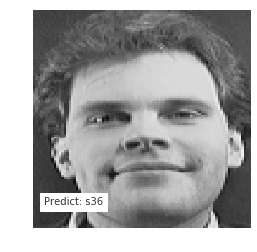

In [28]:
path = 'orl_faces_cnn/Test/s36/1.png'
predictPic(path)

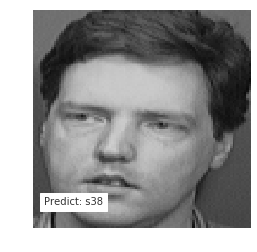

In [29]:
predictPic('orl_faces_cnn/Test/s38/1.png')

In [30]:
# predict album

def predictAlbum(path):
    labels = [filename for filename in os.listdir(test_path) if not filename.startswith('.')]
    album = []
    for label in labels:
        filePath = os.path.join(path, label)
        for img in os.listdir(filePath):
            if not img.startswith('.'):
                img = image.load_img(os.path.join(path, label, img), target_size=(224, 224))
                album.append(img)

    plt.figure(figsize=(4*6,11*6))
    for i in range(len(album)):
        x = image.img_to_array(album[i])
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        predict_index = np.argmax(model.predict(x), axis=1)[0] # index of the max in a row
        predict_class = breed_dict[predict_index]

        ax = plt.subplot(11, 4, i+1)
        ax.imshow(album[i])
        ax.text(10, 200, 'Predict: %s' % predict_class, color='k', backgroundcolor='w', alpha=0.8, fontsize=16)
        ax.axis('off')

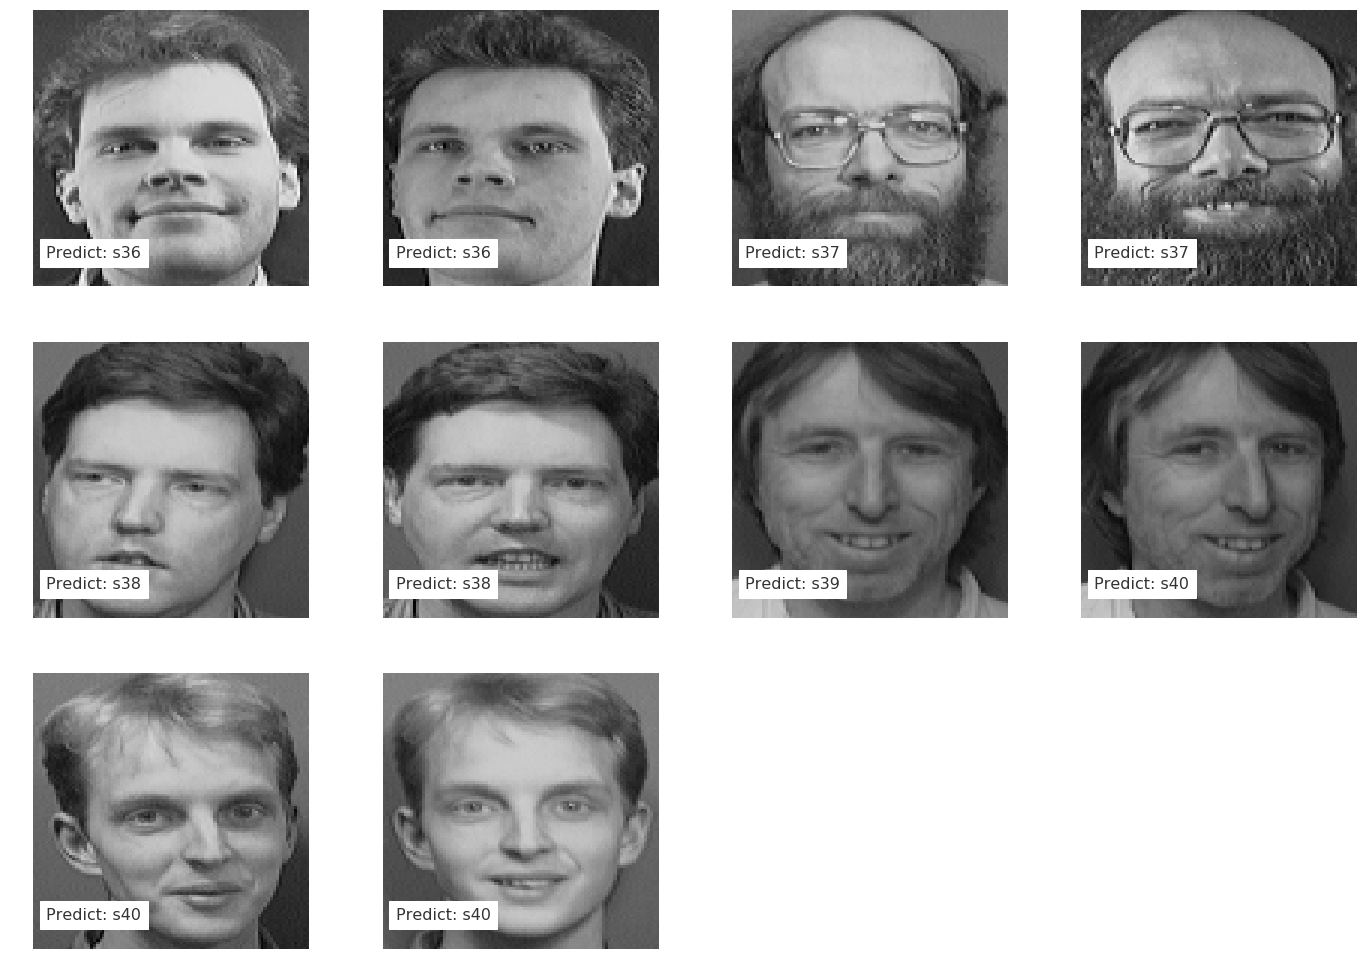

In [31]:
predictAlbum(test_path)

a much better result!

Network Architecture | Accuracy
------------- | ------------- 
1 |  0.2222
2 |  0.2594
3 |  0.2616 
4 |  1.0000


## Part 7: - Network initialization

On _your Deep Learning model data_   
* Change the network initialization (use at least two). How does it effect the accuracy?  
* How does it effect how quickly the network plateaus?  
* Various forms of network initialization:  
-	0   
-	Uniform  
-	Gaussian   
-	Xavier Glorot Initialization   [http://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization](http://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization)  
    -	Xavier Uniform  
    -	Xavier Gaussian  


https://keras.io/initializers/


### 7.1 RandomUniform

keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)

Initializer that generates tensors with a uniform distribution.

Arguments

minval: A python scalar or a scalar tensor. Lower bound of the range of random values to generate.

maxval: A python scalar or a scalar tensor. Upper bound of the range of random values to generate. Defaults to 1 for float types.

seed: A Python integer. Used to seed the random generator.


In [82]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,
                kernel_initializer='random_uniform',
                bias_initializer='zeros'))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

In [83]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=10, verbose=2)

Epoch 1/10
 - 10s - loss: 6.8938 - acc: 0.2556 - val_loss: 4.3979 - val_acc: 0.2000
Epoch 2/10
 - 7s - loss: 5.8859 - acc: 0.1444 - val_loss: 4.2347 - val_acc: 0.2000
Epoch 3/10
 - 7s - loss: 4.0128 - acc: 0.1667 - val_loss: 4.1872 - val_acc: 0.2000
Epoch 4/10
 - 7s - loss: 4.6241 - acc: 0.2000 - val_loss: 4.2066 - val_acc: 0.2000
Epoch 5/10
 - 8s - loss: 4.2501 - acc: 0.2000 - val_loss: 4.1993 - val_acc: 0.2000
Epoch 6/10
 - 7s - loss: 3.4993 - acc: 0.1889 - val_loss: 4.1844 - val_acc: 0.2000
Epoch 7/10
 - 7s - loss: 3.2625 - acc: 0.1889 - val_loss: 4.1924 - val_acc: 0.2000
Epoch 8/10
 - 7s - loss: 3.7056 - acc: 0.2000 - val_loss: 4.2225 - val_acc: 0.2000
Epoch 9/10
 - 7s - loss: 3.7390 - acc: 0.1889 - val_loss: 4.2454 - val_acc: 0.2000
Epoch 10/10
 - 7s - loss: 3.1157 - acc: 0.1889 - val_loss: 1.9005 - val_acc: 0.2000


Accuracy rate did not change significantly

### 7.2 Initializer

keras.initializers.Initializer()

Initializer base class: all initializers inherit from this class.



In [89]:
keras.initializers.Initializer()

In [90]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [91]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 11s - loss: 3.8983 - acc: 0.2444 - val_loss: 1.6663 - val_acc: 0.2000
Epoch 2/5
 - 7s - loss: 1.8309 - acc: 0.2111 - val_loss: 1.5796 - val_acc: 0.4000
Epoch 3/5
 - 7s - loss: 1.7473 - acc: 0.2889 - val_loss: 1.5660 - val_acc: 0.2000
Epoch 4/5
 - 7s - loss: 1.5875 - acc: 0.2333 - val_loss: 1.5144 - val_acc: 0.2000
Epoch 5/5
 - 7s - loss: 1.4986 - acc: 0.3111 - val_loss: 1.4708 - val_acc: 0.7000


### 7.3 Zeros

keras.initializers.Zeros()

Initializer that generates tensors initialized to 0.

In [93]:
keras.initializers.Zeros()

In [94]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [95]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 10s - loss: 6.3994 - acc: 0.1333 - val_loss: 4.0091 - val_acc: 0.2000
Epoch 2/5
 - 7s - loss: 5.9255 - acc: 0.2000 - val_loss: 9.8031 - val_acc: 0.2000
Epoch 3/5
 - 7s - loss: 8.1312 - acc: 0.2000 - val_loss: 4.0926 - val_acc: 0.2000
Epoch 4/5
 - 7s - loss: 4.5659 - acc: 0.2333 - val_loss: 3.7901 - val_acc: 0.2000
Epoch 5/5
 - 7s - loss: 7.7961 - acc: 0.2444 - val_loss: 3.2236 - val_acc: 0.2000


### 7.4 Ones

keras.initializers.Ones()

Initializer that generates tensors initialized to 1.

In [96]:
keras.initializers.Ones()

In [97]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [98]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 11s - loss: 6.4227 - acc: 0.2111 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 2/5
 - 7s - loss: 6.6570 - acc: 0.1667 - val_loss: 4.2172 - val_acc: 0.2000
Epoch 3/5
 - 7s - loss: 4.0902 - acc: 0.2889 - val_loss: 4.0845 - val_acc: 0.4000
Epoch 4/5
 - 7s - loss: 4.0065 - acc: 0.2778 - val_loss: 3.5549 - val_acc: 0.3000
Epoch 5/5
 - 7s - loss: 6.3037 - acc: 0.2778 - val_loss: 12.8945 - val_acc: 0.2000


### 7.5 Constant

In [99]:
keras.initializers.Constant(value=0)

In [100]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [101]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 11s - loss: 7.2286 - acc: 0.1778 - val_loss: 6.7113 - val_acc: 0.4000
Epoch 2/5
 - 7s - loss: 6.5490 - acc: 0.1889 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 3/5
 - 7s - loss: 8.2650 - acc: 0.2222 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 4/5
 - 7s - loss: 9.8707 - acc: 0.1667 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 5/5
 - 7s - loss: 8.6234 - acc: 0.2111 - val_loss: 9.6709 - val_acc: 0.4000


### 7.6 RandomNormal

In [102]:
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

In [103]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [104]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 11s - loss: 4.3735 - acc: 0.2667 - val_loss: 2.4931 - val_acc: 0.2000
Epoch 2/5
 - 7s - loss: 2.0049 - acc: 0.2444 - val_loss: 1.5763 - val_acc: 0.0000e+00
Epoch 3/5
 - 7s - loss: 1.5974 - acc: 0.1667 - val_loss: 1.5500 - val_acc: 0.0000e+00
Epoch 4/5
 - 7s - loss: 1.7404 - acc: 0.1444 - val_loss: 1.5266 - val_acc: 0.0000e+00
Epoch 5/5
 - 7s - loss: 1.7211 - acc: 0.1444 - val_loss: 1.5012 - val_acc: 0.0000e+00


### 7.7 RandomUniform

In [105]:
keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)

In [106]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [107]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 10s - loss: 7.8159 - acc: 0.1889 - val_loss: 6.5075 - val_acc: 0.2000
Epoch 2/5
 - 7s - loss: 6.8688 - acc: 0.1444 - val_loss: 6.4472 - val_acc: 0.2000
Epoch 3/5
 - 7s - loss: 7.1707 - acc: 0.2111 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 4/5
 - 7s - loss: 8.2541 - acc: 0.1889 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 5/5
 - 7s - loss: 9.1630 - acc: 0.2000 - val_loss: 9.6709 - val_acc: 0.2000


### 7.8 TruncatedNormal

In [108]:
keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)

In [109]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [110]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 10s - loss: 8.5188 - acc: 0.2000 - val_loss: 6.5288 - val_acc: 0.2000
Epoch 2/5
 - 7s - loss: 7.8097 - acc: 0.2333 - val_loss: 6.7292 - val_acc: 0.3000
Epoch 3/5
 - 7s - loss: 8.5314 - acc: 0.2000 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 4/5
 - 8s - loss: 9.3702 - acc: 0.2444 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 5/5
 - 7s - loss: 7.3011 - acc: 0.2333 - val_loss: 6.7242 - val_acc: 0.2000


### 7.9 VarianceScaling

In [111]:
keras.initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None)

In [112]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [113]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 10s - loss: 5.9997 - acc: 0.1778 - val_loss: 3.9628 - val_acc: 0.2000
Epoch 2/5
 - 6s - loss: 4.4317 - acc: 0.2889 - val_loss: 3.2236 - val_acc: 0.2000
Epoch 3/5
 - 7s - loss: 6.6027 - acc: 0.2000 - val_loss: 10.0341 - val_acc: 0.3000
Epoch 4/5
 - 7s - loss: 7.9231 - acc: 0.2000 - val_loss: 6.8949 - val_acc: 0.2000
Epoch 5/5
 - 7s - loss: 5.6336 - acc: 0.2111 - val_loss: 4.0631 - val_acc: 0.2000


### 7.10 Orthogonal

In [114]:
keras.initializers.Orthogonal(gain=1.0, seed=None)

In [115]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [116]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 10s - loss: 4.9734 - acc: 0.1667 - val_loss: 3.8367 - val_acc: 0.2000
Epoch 2/5
 - 6s - loss: 4.6727 - acc: 0.2333 - val_loss: 3.4997 - val_acc: 0.2000
Epoch 3/5
 - 6s - loss: 7.3825 - acc: 0.2778 - val_loss: 9.8954 - val_acc: 0.3000
Epoch 4/5
 - 6s - loss: 8.8596 - acc: 0.2333 - val_loss: 6.5180 - val_acc: 0.2000
Epoch 5/5
 - 7s - loss: 7.1844 - acc: 0.2111 - val_loss: 6.4472 - val_acc: 0.2000


### 7.11 Identity

In [117]:
keras.initializers.Identity(gain=1.0)

In [118]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [119]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 10s - loss: 6.4905 - acc: 0.2111 - val_loss: 6.6542 - val_acc: 0.2000
Epoch 2/5
 - 7s - loss: 5.8955 - acc: 0.2000 - val_loss: 4.0703 - val_acc: 0.2000
Epoch 3/5
 - 6s - loss: 4.3516 - acc: 0.2000 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 4/5
 - 6s - loss: 7.2090 - acc: 0.2000 - val_loss: 4.3744 - val_acc: 0.2000
Epoch 5/5
 - 6s - loss: 5.0604 - acc: 0.2000 - val_loss: 4.2931 - val_acc: 0.2000


### 7.11 lecun_uniform

In [120]:
keras.initializers.lecun_uniform(seed=None)

In [121]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [122]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 11s - loss: 6.2770 - acc: 0.2444 - val_loss: 4.2066 - val_acc: 0.2000
Epoch 2/5
 - 6s - loss: 4.3256 - acc: 0.2000 - val_loss: 3.9647 - val_acc: 0.2000
Epoch 3/5
 - 6s - loss: 4.0561 - acc: 0.2111 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 4/5
 - 7s - loss: 5.1415 - acc: 0.2000 - val_loss: 11.6594 - val_acc: 0.2000
Epoch 5/5
 - 6s - loss: 7.2644 - acc: 0.2000 - val_loss: 10.1090 - val_acc: 0.2000


It doesn't look like a good model, and the accuracy hasn't changed, it has been low.

### 7.12 glorot_normal

In [123]:
keras.initializers.glorot_normal(seed=None)

In [124]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [125]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 11s - loss: 6.8419 - acc: 0.2111 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 2/5
 - 7s - loss: 8.2132 - acc: 0.1556 - val_loss: 6.4472 - val_acc: 0.2000
Epoch 3/5
 - 7s - loss: 8.7867 - acc: 0.1667 - val_loss: 6.4472 - val_acc: 0.2000
Epoch 4/5
 - 7s - loss: 9.3236 - acc: 0.2000 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 5/5
 - 7s - loss: 7.5262 - acc: 0.2444 - val_loss: 9.6709 - val_acc: 0.2000


The loss is reduced first and then increased, and finally there may be a case of overfitting.

### 7.13 glorot_uniform

In [126]:
keras.initializers.glorot_uniform(seed=None)

In [127]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [128]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 11s - loss: 5.6221 - acc: 0.2000 - val_loss: 4.0879 - val_acc: 0.2000
Epoch 2/5
 - 7s - loss: 4.0152 - acc: 0.2000 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 3/5
 - 8s - loss: 7.3341 - acc: 0.2000 - val_loss: 4.6488 - val_acc: 0.2000
Epoch 4/5
 - 7s - loss: 7.0037 - acc: 0.2000 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 5/5
 - 7s - loss: 7.5422 - acc: 0.2222 - val_loss: 6.4472 - val_acc: 0.4000


The loss is reduced and the accuracy is increased.

### 7.14 he_normal

In [129]:
keras.initializers.he_normal(seed=None)

In [130]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [131]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 10s - loss: 5.7826 - acc: 0.2222 - val_loss: 2.4896 - val_acc: 0.0000e+00
Epoch 2/5
 - 7s - loss: 5.3317 - acc: 0.2000 - val_loss: 4.3721 - val_acc: 0.2000
Epoch 3/5
 - 7s - loss: 5.3178 - acc: 0.2111 - val_loss: 1.6399 - val_acc: 0.2000
Epoch 4/5
 - 7s - loss: 1.6554 - acc: 0.1333 - val_loss: 1.5911 - val_acc: 0.2000
Epoch 5/5
 - 6s - loss: 1.7680 - acc: 0.1667 - val_loss: 1.5184 - val_acc: 0.1000


### 7.15 lecun_normal

In [132]:
keras.initializers.lecun_normal(seed=None)

In [133]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [134]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 10s - loss: 6.4822 - acc: 0.1556 - val_loss: 7.0889 - val_acc: 0.2000
Epoch 2/5
 - 6s - loss: 7.3770 - acc: 0.2333 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 3/5
 - 7s - loss: 7.4481 - acc: 0.2111 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 4/5
 - 7s - loss: 7.7435 - acc: 0.2000 - val_loss: 9.6709 - val_acc: 0.2000
Epoch 5/5
 - 7s - loss: 8.4634 - acc: 0.2111 - val_loss: 9.6709 - val_acc: 0.2000


There is no obvious change, the accuracy rate has been low, not a good model.

### 7.16 he_uniform

In [9]:
keras.initializers.he_uniform(seed=None)

In [136]:
# set up model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(96))
model.add(Activation('linear'))
model.add(Dropout(0.5))

model.add(Dense(nClass))
model.add(Activation('linear'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [137]:
model.fit_generator(train_batches, steps_per_epoch=3, 
                    validation_data = valid_batches, validation_steps=1, 
                    epochs=5, verbose=2)

Epoch 1/5
 - 11s - loss: 3.8486 - acc: 0.1667 - val_loss: 1.6027 - val_acc: 0.2000
Epoch 2/5
 - 7s - loss: 1.7487 - acc: 0.2111 - val_loss: 1.5677 - val_acc: 0.2000
Epoch 3/5
 - 7s - loss: 1.5403 - acc: 0.2778 - val_loss: 1.5447 - val_acc: 0.6000
Epoch 4/5
 - 7s - loss: 1.5882 - acc: 0.2889 - val_loss: 1.5249 - val_acc: 0.7000
Epoch 5/5
 - 7s - loss: 1.5326 - acc: 0.2778 - val_loss: 1.5012 - val_acc: 0.9000


The loss is reduced and the accuracy is increased. This looks like a good model!

Network initialization | Accuracy
------------- | ------------- 
RandomUniform |  0.2000
Initializer |  0.7000
Zeros |  0.2444
Ones |  0.4000
Constant |  0.4000
RandomNormal |  0.2667
RandomUniform |  0.2111
TruncatedNormal |  0.4000
VarianceScaling |  0.3000
Orthogonal |  0.3000
Identity |  0.2111
lecun_uniform |  0.2444
glorot_normal |  0.4000
glorot_uniform |  0.4000
he_normal |  0.2222
lecun_normal |  0.2333 
he_uniform |  0.9000

# license

Copyright <2019> Rui Wang

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.